In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [7]:
df =pd.read_csv('/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [12]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [13]:
df.drop(['User ID'], axis = 1, inplace = True)

In [14]:
df.shape

(400, 4)

In [16]:
df.shape

(380, 4)

In [15]:
df = df.drop_duplicates()

In [17]:
q3 = df.Age.quantile(0.75)
q1 = df.Age.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(3.5, 71.5)

In [18]:
q3 = df.EstimatedSalary.quantile(0.75)
q1 = df.EstimatedSalary.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-24500.0, 155500.0)

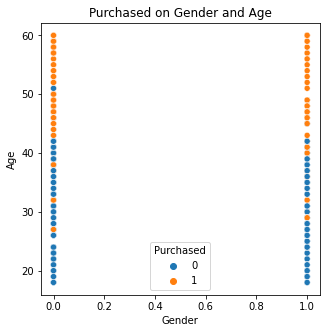

In [19]:
#EDA
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Gender', y = 'Age', hue = 'Purchased', data = df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Purchased on Gender and Age')
plt.show()

<Figure size 360x288 with 0 Axes>

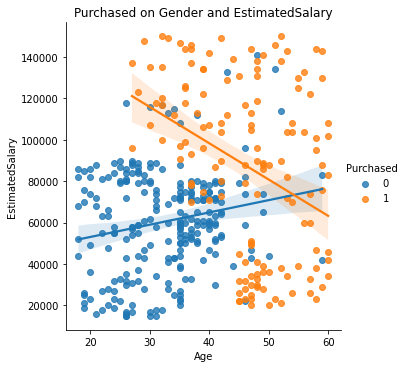

In [20]:
plt.figure(figsize = (5,4))
sns.lmplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = df)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Purchased on Gender and EstimatedSalary')
plt.show()

**Splitting the dataset into the Training set and Test set**

In [21]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

**Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

**Step 3 | Predection**

In [24]:
y_predict = log.predict(X_test)

In [26]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
91,0,0
215,1,1
52,0,0
345,0,0
276,0,0
...,...,...
352,1,1
228,0,0
84,0,0
93,0,0


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [27]:
from sklearn.metrics import f1_score, accuracy_score, plot_roc_curve, confusion_matrix

In [28]:
log.score(X_test, y_test)

0.8771929824561403

In [29]:
f1_score(y_test, y_predict)

0.8333333333333333

In [30]:
confusion_matrix(y_test, y_predict)

array([[65,  6],
       [ 8, 35]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


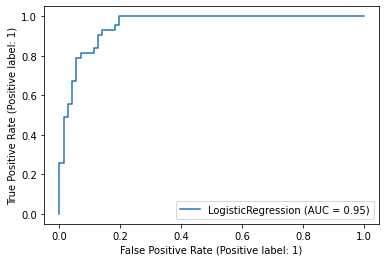

In [31]:
plot_roc_curve(log, X_test, y_test)

**Visualization**

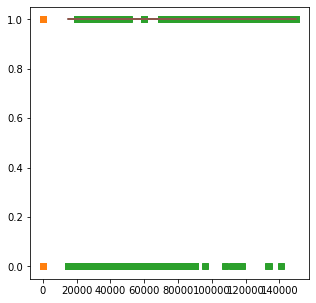

In [32]:
plt.figure(figsize=(5,5))
plt.plot(X,y,"s")
plt.plot(X,log.predict(X))